# Yeast metabolism

## Installation Instructions

This notebook uses the following packages:

- `pandas`
- `ipython`
- `rpa_finder`

You can install these packages using the following commands:

```bash
pip install pandas ipython rpa_finder


We here describe the metabolic pathways of yeast. See [arXiv:2307.07444](https://arxiv.org/abs/2307.07444) for more details.



In [1]:

import pandas as pd
from rpa_finder.reaction_system import ReactionSystem
from IPython.display import Markdown, display


def transpose(matrix): # transpose a list of lists
    return list(map(list, zip(*matrix)))


def list_indices(network, input_type='string'):
    system = ReactionSystem(network, input_type)
    bs = system.enumerate_buffering_structures()
    
    influence_indices = [system.compute_influence_index(b) for b in bs]
    num_emergent_cycles = [ len(system.get_emergent_cycles(b)) for b in bs]
    num_emergent_conserved_quantities = [ len(system.get_emergent_conserved_quantities(b)) for b in bs]
    num_lost_conserved_quantities = [ len(system.get_lost_conserved_quantities(b)) for b in bs]    

    bs_name = [ system.bs_to_name(b) for b in bs]
    bs_T = transpose(bs_name)

    bs_data = {
        'species' : bs_T[0],
        'reactions' : bs_T[1],
        'influence index' : influence_indices,
        'em. cycles' : num_emergent_cycles,
        'lost cons. quant.' : num_lost_conserved_quantities,
        'em. cons. quant.' : num_emergent_conserved_quantities
    }

    title_bs = 'Buffering structures'
    df_bs = pd.DataFrame(bs_data)
    styled_df_bs = df_bs.style.set_table_attributes('style="font-size: 13px"').set_caption(title_bs)

    display(styled_df_bs)



network_yeast = [
        ['"Glucose"', '"G6P"'],
        ['"G6P"', '"F6P"'],['"F6P"', '"G6P"'],
        ['"F6P"', '"F16P"'],
        ['"F16P"', '"G3P" + "DHAP"'],
        ['"DHAP"', '"G3P"'],
        ['"G3P"', '"PGP"'],
        ['"PGP"', '"3PG"'], ['"3PG"', '"PGP"'],
        ['"3PG"', '"2PG"'], ['"2PG"', '"3PG"'],
        ['"2PG"', '"PEP"'], ['"PEP"', '"2PG"'],
        ['"PEP"', '"PYR"'],
        ['"G6P"', '"PG6"'],
        ['"PG6"', '"Ru5P" + "CO2"'],
        ['"Ru5P"', '"X5P"'],
        ['"Ru5P"', '"R5P"'],
        ['"X5P" + "R5P"', '"G3P" + "S7P"'],
        ['"G3P" + "S7P"', '"X5P" + "R5P"'],
        ['"G3P" + "S7P"', '"F6P" + "E4P"'],
        ['"F6P" + "E4P"', '"G3P" + "S7P"'],
        ['"X5P" + "E4P"', '"F6P" + "G3P"'],
        ['"F6P" + "G3P"', '"X5P" + "E4P"'],
        ['"PG6"', '"G3P" + "PYR"'],
        ['"PYR"', '"Acetal" + "CO2"'],
        ['"Acetal"', '"Ethanol"'],
        ['"Ethanol"', '"Acetal"'],
        ['"R5P"', ''],
        ['"CO2"', ''],
        ['', '"Glucose"'],
        ['"Ethanol"', ''],
        ['"Acetal"', ''],
        ['"PYR"', '"Ala"'],
        ['"Ala"', '"PYR"'],
        ['"Ala"', ''],
    ]


system_yeast = ReactionSystem(network_yeast)




We can identify labeled buffering structures as follows:

In [2]:
lbs_yeast = system_yeast.enumerate_labeled_buffering_structures()

for l in lbs_yeast:
    print(l)



[[0], [12], [], [0]]
[[1, 2, 3, 14, 15, 16, 17, 24], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35], []]
[[4], [8], [], [4]]
[[5], [5], [], [5]]
[[6], [6, 10, 19, 20], [18, 19, 20, 21, 22, 23], [6]]
[[7], [15], [], [7]]
[[8], [15], [7, 8], []]
[[9], [1, 15], [7, 8], [9]]
[[10], [1, 15], [7, 8, 9, 10], []]
[[11], [0, 1, 15], [7, 8, 9, 10], [11]]
[[12], [0, 1, 15], [7, 8, 9, 10, 11, 12], []]
[[13], [0, 1, 13, 15], [7, 8, 9, 10, 11, 12], [13]]
[[18, 19, 20, 21, 22], [6, 19, 20], [18, 19, 20, 21], [22]]
[[23], [6, 19, 20], [18, 19, 20, 21, 22, 23], []]
[[25, 33, 34, 35], [2, 3, 4, 7, 16], [25, 26, 27, 29, 31, 32, 33, 34, 35], []]
[[26, 27, 31, 32], [2, 7], [26, 27, 31, 32], []]
[[28], [6, 17, 19, 20], [18, 19, 20, 21], [22, 28]]
[[29], [4], [], [29]]
[[30], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [0, 1, 

In [3]:
list_indices(network_yeast)

,species,reactions,influence index,em. cycles,lost cons. quant.,em. cons. quant.
0,['Glucose'],[0],0,0,0,0
1,"['2PG', '3PG', 'Acetal', 'Ala', 'CO2', 'DHAP', 'E4P', 'Ethanol', 'F16P', 'F6P', 'G3P', 'G6P', 'PEP', 'PG6', 'PGP', 'PYR', 'R5P', 'Ru5P', 'S7P', 'X5P']","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35]",0,0,0,0
2,['F16P'],[4],0,0,0,0
3,['DHAP'],[5],0,0,0,0
4,"['E4P', 'G3P', 'S7P', 'X5P']","[6, 18, 19, 20, 21, 22, 23]",0,0,0,0
5,['PGP'],[7],0,0,0,0
6,['PGP'],"[7, 8]",0,0,0,0
7,"['3PG', 'PGP']","[7, 8, 9]",0,0,0,0
8,"['3PG', 'PGP']","[7, 8, 9, 10]",0,0,0,0
9,"['2PG', '3PG', 'PGP']","[7, 8, 9, 10, 11]",0,0,0,0


Let us find the integrator equations that realize the RPA property represented by a labeled buffering structure.

In [4]:

num = 4

print("Let us find the integrators for the following LBS:")
print(lbs_yeast[num])

integrators = system_yeast.find_integrators_from_lbs(lbs_yeast[num], pinv_mode='sympy')


for i in range(4):
    display( Markdown("$\\frac{d}{dt}" + integrators[2*i] + "=" + integrators[2*i+1] + "$") )




Let us find the integrators for the following LBS:
[[6], [6, 10, 19, 20], [18, 19, 20, 21, 22, 23], [6]]


$\frac{d}{dt}\left[\begin{matrix}\end{matrix}\right]=\left[\begin{matrix}\end{matrix}\right]$

$\frac{d}{dt}\left[\begin{matrix}x_{2PG}\\x_{3PG}\\x_{Acetal}\\x_{Ala}\\x_{CO2}\\x_{DHAP}\\x_{Ethanol}\\x_{F16P}\\x_{F6P} + x_{S7P} + x_{X5P}\\x_{G6P}\\x_{Glucose}\\x_{PEP}\\x_{PG6}\\\frac{x_{E4P}}{2} + x_{G3P} + x_{PGP} - \frac{x_{S7P}}{2} + \frac{x_{X5P}}{2}\\x_{PYR}\\\frac{x_{E4P}}{2} + x_{R5P} + \frac{x_{S7P}}{2} - \frac{x_{X5P}}{2}\\x_{Ru5P}\end{matrix}\right]=\left[\begin{matrix}r_{10} - r_{11} - r_{12} + r_{13}\\- r_{10} + r_{11} + r_{8} - r_{9}\\r_{26} - r_{27} + r_{28} - r_{33}\\r_{34} - r_{35} - r_{36}\\r_{16} + r_{26} - r_{30}\\r_{5} - r_{6}\\r_{27} - r_{28} - r_{32}\\r_{4} - r_{5}\\r_{17} + r_{2} - r_{3} - r_{4}\\- r_{15} + r_{1} - r_{2} + r_{3}\\- r_{1} + r_{31}\\r_{12} - r_{13} - r_{14}\\r_{15} - r_{16} - r_{25}\\\frac{r_{17}}{2} + r_{25} + r_{5} + r_{6} - r_{8} + r_{9}\\r_{14} + r_{25} - r_{26} - r_{34} + r_{35}\\- \frac{r_{17}}{2} + r_{18} - r_{29}\\r_{16} - r_{17} - r_{18}\end{matrix}\right]$

$\frac{d}{dt}\left[\begin{matrix}- \frac{x_{E4P}}{2} - x_{G3P} + \frac{x_{S7P}}{2} - \frac{x_{X5P}}{2}\end{matrix}\right]=\left[\begin{matrix}- \frac{r_{17}}{2} - r_{25} - r_{5} - r_{6} + r_{7}\end{matrix}\right]$

$\frac{d}{dt}\left[\begin{matrix}x_{PGP}\end{matrix}\right]=\left[\begin{matrix}r_{7} - r_{8} + r_{9}\end{matrix}\right]$

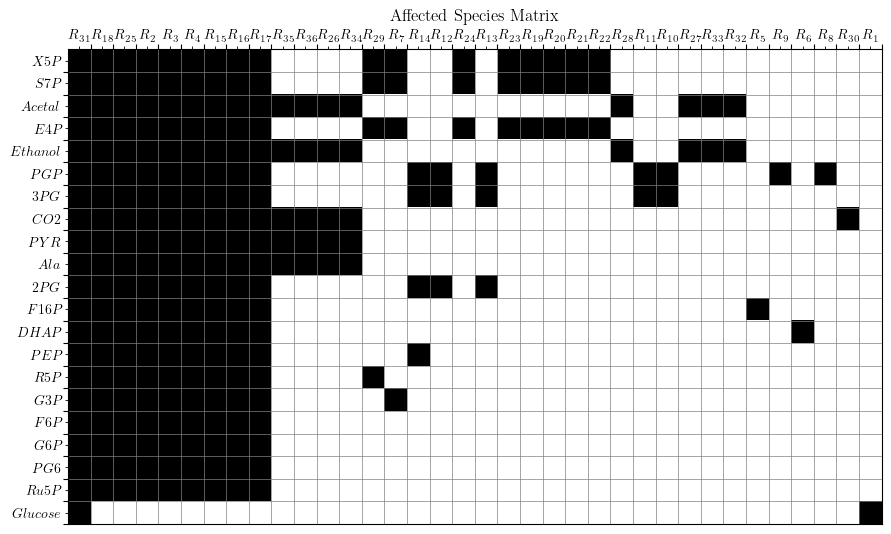

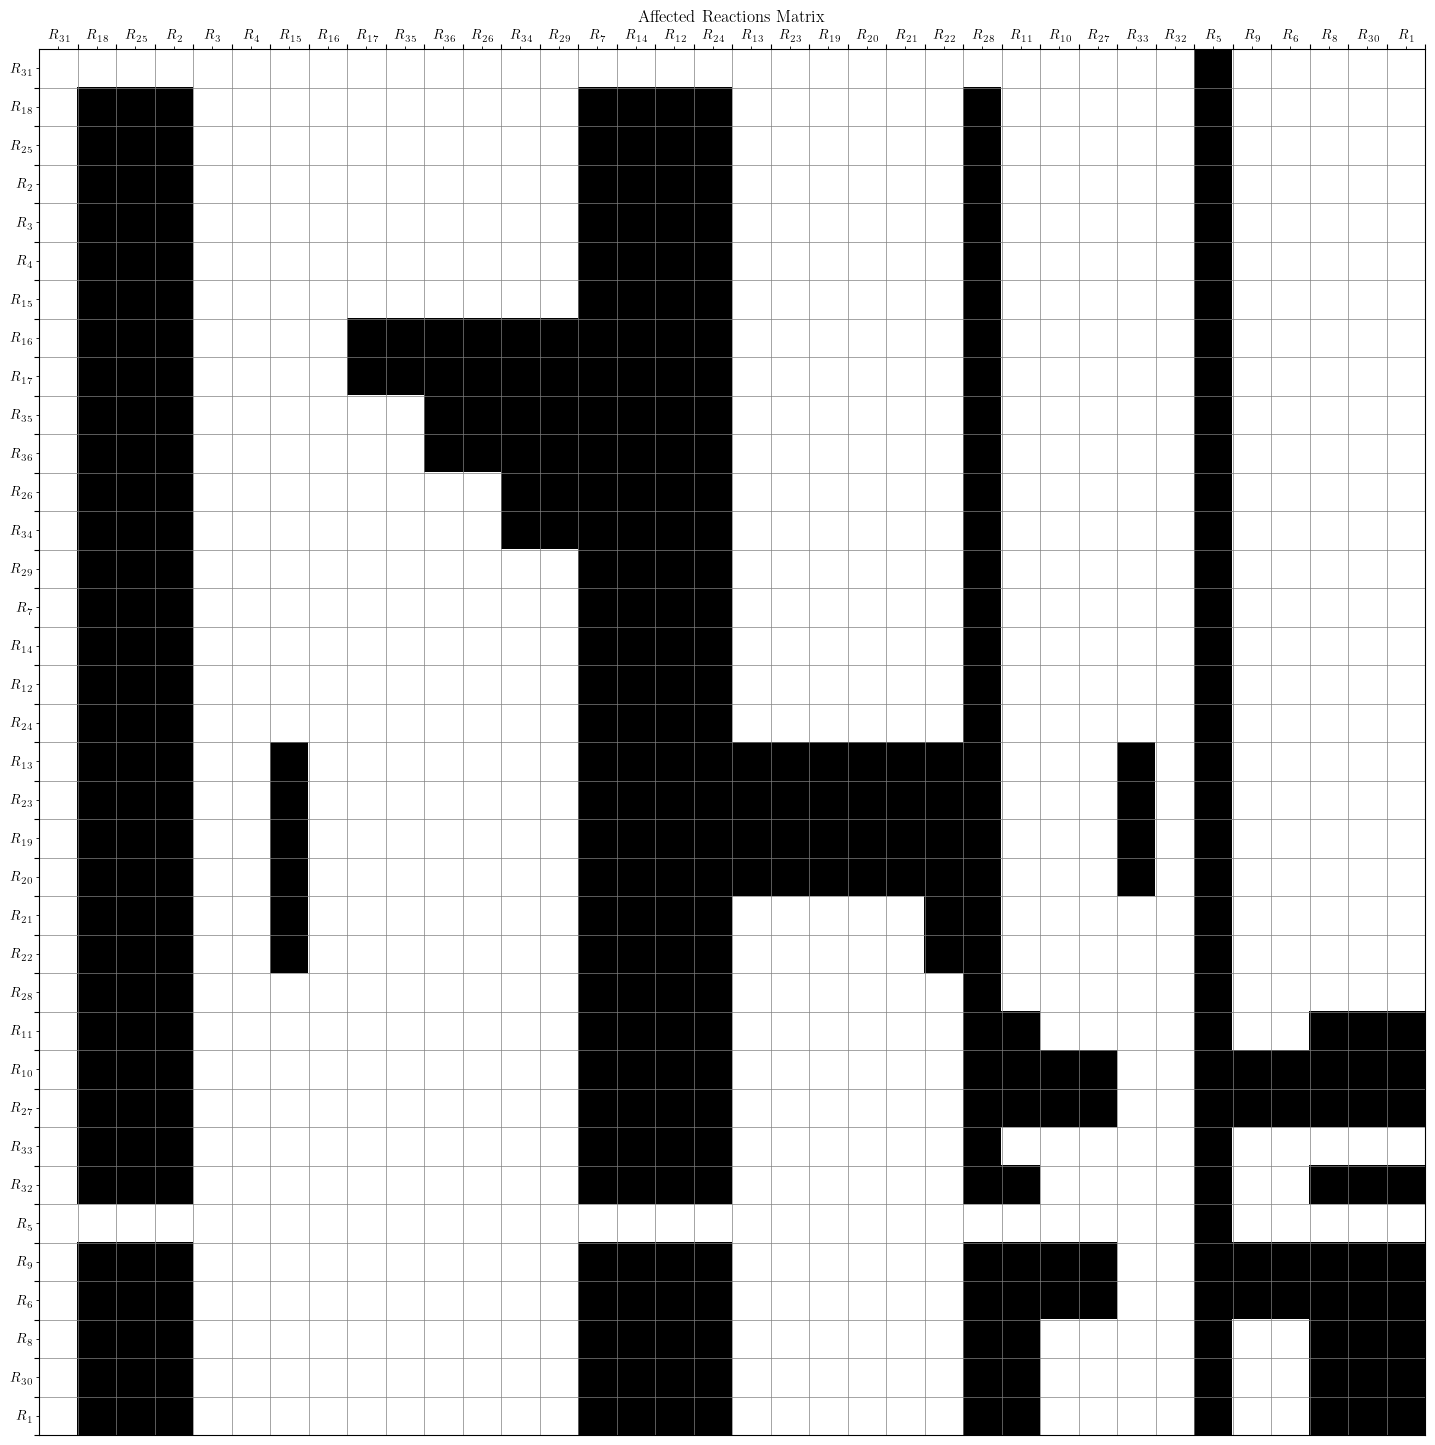

In [5]:
system_yeast.draw_affected_matrix()